# Investigating the transitive property in sports matches using adjacency matrices

> If **A** beats **B** and **B** beats **C**, does **A** beat **C**? 

If the above statement is true, then we say that the **transitive property** would be displayed. 
\
\
Without even knowing the term '*transitive property*', it is a common theme discussed by sports lovers and has applications in the prediction of match outcomes. 
\
Surprisingly, after quite a bit of searching, I have not seen anyone answer this exact question before, for any sport, let alone the sport of MMA, which we will cover here.
\
\
In the MMA community, a question often discussed is "*Does MMA Math work as a predictor of fight outcomes?*", which really means "*Do MMA matches display the transitive property*"
\
\
We all know that it does not capture the full picture due to the complexity of fighter characteristics, styles and contexts.
\
\
A better question to ask is **"How often does MMA math work"** or
> **What percentage of UFC Fight sequences display the transitive property?** 

When I say '**fight sequence**' I mean '**a sequence of 3 fights where Fighter A,B and C have all fought eachother**'. 
\
\
**Why 3**? Firstly, it is the minimum number of fights needed to display the transitive property. 
However, in theory, we could use a sequence of more than 3 fights, and it would only require you to change one number in the code. However, the practicality of the results starts to dwindle with anything more than 3. 
\
A great website https://www.mma-math.com displays this. With just a 4 fight sequence, you can reason about a fighter in the lightest weight class defeating a fighter in the heaviest weight class, which is absurd.
\
\
We will aim to answer our question with an elegant solution that uses ideas from Network Theory. I previously solved this problem using a 'brute force' approach and it ended up being a tad messy and computationally expensive. This is a very simple solution to program and understand, and it doesn't take so long to compute.

Another representation of this problem is:
> *If fighter relationships are represented by both a directed and undirected graph, each 'cycle' of length 3 and whether it is cyclic or acyclic will be able to tell us if the transitive property has been shown in that particular 3 fight sequence.*

This reduces the problem to finding two quantities:
1. The number of cycles (triangles) in the **undirected** graph
2. The number of cycles in the **directed** graph


In the **undirected** case there are 3 cycles: (5,1,4), (0,5,4), (0,4,2) 
\
In the **directed** case, there is only one cycle, due to the constraint of the arrow direction: (0,4,5)

<div>
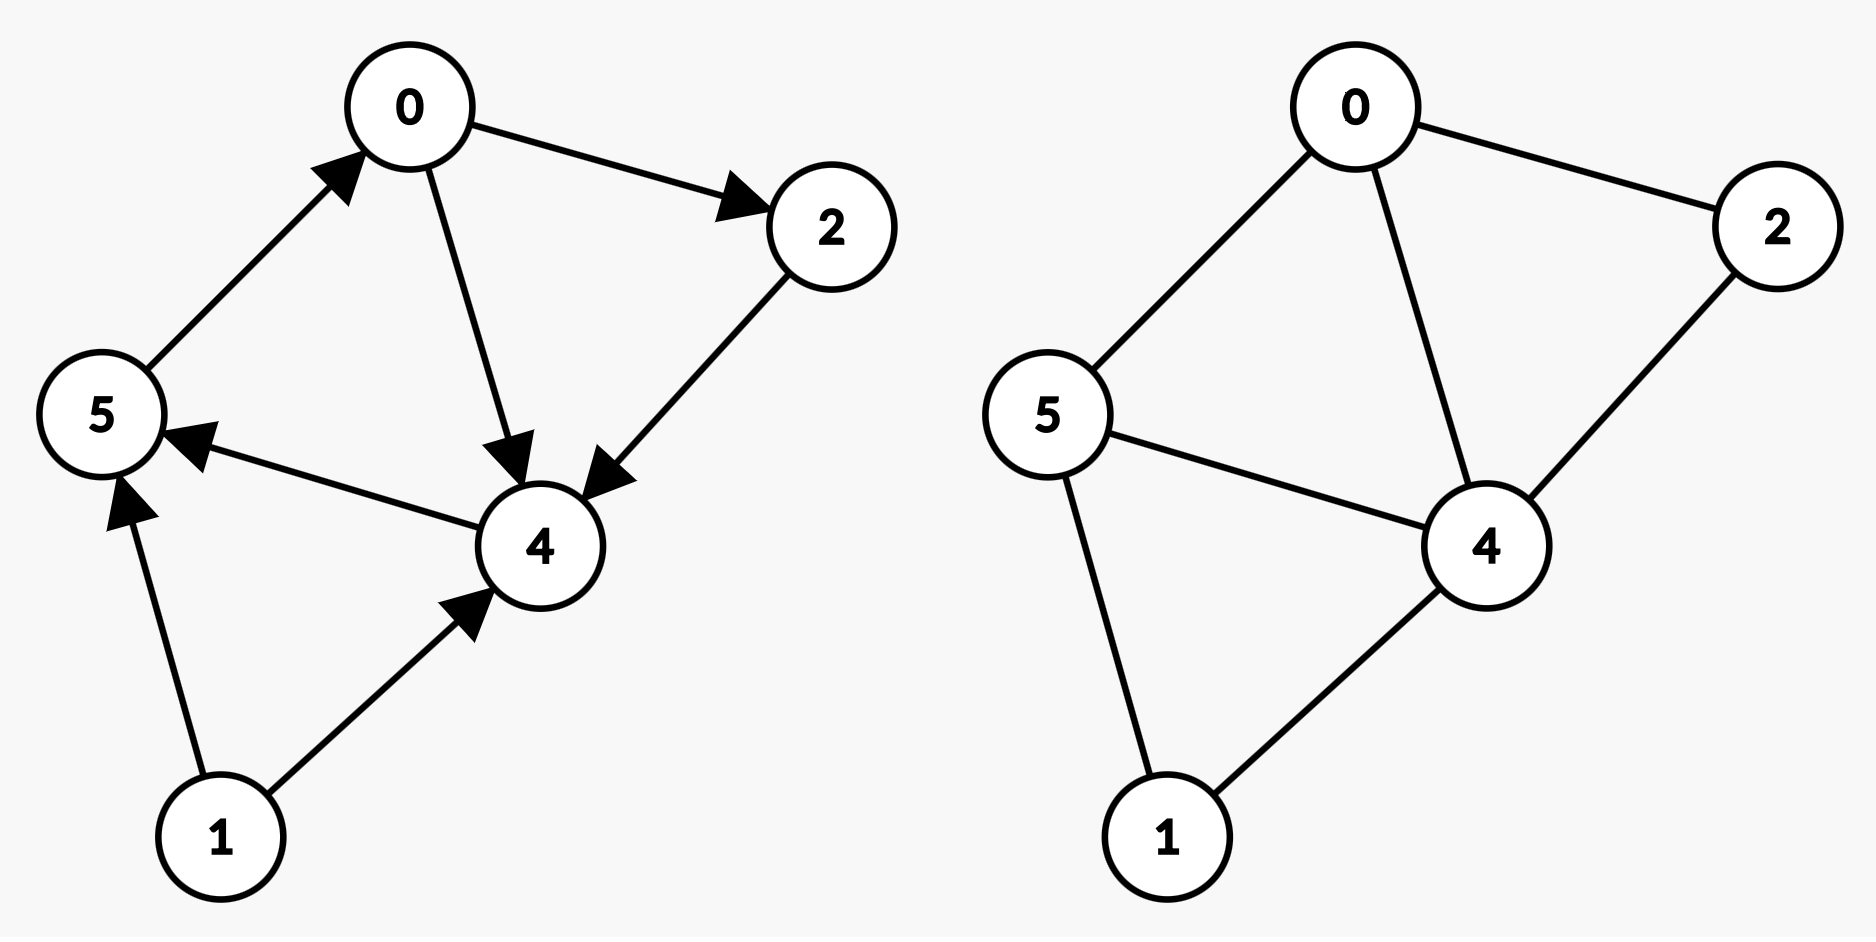
</div>

We can find out the answer to this problem by taking advantage of an interesting property of the adjacency matrix representation of a graph. 

> *If the adjacency matrix is **$M_{i,j}$**, then **$M^{n}$** tells you the number of paths of length **$n$** that exist between nodes **$i$** and **$j$**. Therefore the sum of the diagonal of **$M^{n}$** will tell you the amount of cycles of length **$n$**.*


In the **directed** case, a cycle means that the **transitive property is NOT displayed**, because for a cycle to occur that would mean **A** beats **B**, **B** beats **C**, and **C** beats **A**. Thus being non-transitive.

In the **undirected** case, a cycle only tells us whether a 3-fight-sequence has occured (i.e where A, B and C have all fought eachother), and not whether it is a transitive sequence or not.


We are trying to find out the percentage of times that the transitive property applies to UFC fights, so the following ratio is what we are after:

\begin{equation*}
Transitive\% = \frac{undirectedcycles - directedcycles}{directedcycles}
\end{equation*}

where:
\begin{equation*}
undirectedcycles - directedcycles
\end{equation*}
\
\
Is the number of 'triangles' that don't count as a cycle because the of the arrow direction. When this occurs it means that the transitive property is displayed.


## Let us begin

### Import Data

Originally scraped from mmastats.com using code I wrote found here:
\
https://github.com/RyanJMcBride/MMAProject-draft-/blob/main/fightscraper.ipynb

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/RyanJMcBride/MMA-math/master/UFC_Fight_Data_new.csv')

In [23]:
df

,Date,Event,F1,F2,win,draw,nc
0,2021-06-26,UFC Fight Night: Gane vs. Volkov,Ciryl Gane,Alexander Volkov,1,0,0
1,2021-06-26,UFC Fight Night: Gane vs. Volkov,Tanner Boser,Ovince Saint Preux,1,0,0
2,2021-06-26,UFC Fight Night: Gane vs. Volkov,Timur Valiev,Raoni Barcelos,1,0,0
3,2021-06-26,UFC Fight Night: Gane vs. Volkov,Andre Fili,Daniel Pineda,0,0,1
4,2021-06-26,UFC Fight Night: Gane vs. Volkov,Tim Means,Nicolas Dalby,1,0,0
...,...,...,...,...,...,...,...
6170,1994-03-11,UFC 2: No Way Out,Orlando Wiet,Robert Lucarelli,1,0,0
6171,1994-03-11,UFC 2: No Way Out,Frank Hamaker,Thaddeus Luster,1,0,0
6172,1994-03-11,UFC 2: No Way Out,Johnny Rhodes,David Levicki,1,0,0
6173,1994-03-11,UFC 2: No Way Out,Patrick Smith,Ray Wizard,1,0,0


### Create the adjacency matrix for the directed graph

A directed graph represents the relationships bewteen fighters, i.e. who has beaten who. 
Construct adjacency matrix from fight data.

An adjacency matrix will look different for a directed and undirected graph.

> A **directed graph** will produce an asymmetrical matrix, **M**, and the value of **M(i,j)** will be 1 if i **defeated** j.

> An **undirected** graph will produce a symmetrical matrix, **M**, and the value of **M(i,j)** will be 1 if i **fought** j.


The following code turns the data in df.F1 and df.F2 into an adjacency matrix of a directed graph. Ensure all fighters are included in both the row and column indexes and convert to a numpy array for computation.

In [24]:
df = pd.crosstab(df.F1, df.F2) 
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)
M = df.to_numpy()

In [25]:
df

,Aalon Cruz,Aaron Brink,Aaron Phillips,Aaron Riley,Aaron Rosa,Aaron Simpson,Aaron Wilkinson,Abdul Razak Alhassan,Abdul-Kerim Edilov,Abel Trujillo,...,Zak Ottow,Zane Frazier,Zarah Fairn,Zarrukh Adashev,Zelim Imadaev,Zhalgas Zhumagulov,Zhang Lipeng,Zhang Tiequan,Zhang Weili,Zubaira Tukhugov
Aalon Cruz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aaron Brink,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aaron Phillips,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aaron Riley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aaron Rosa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zhang Lipeng,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zhang Tiequan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zhang Weili,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note that the matrix is very sparse since there are >2000 rows and columns, and only approx. 5000 fights. 

### Create the adjacency matrix for the un-directed graph

To create this adjacency matrix, we just have to mirror the directed adjacency matrix about its diagonal, which can be achieved by adding its transpose to itself.

In [26]:
M_undirected = M + M.T

### Find number of cycles/triangles

To do this, we just have to compute $M^{3}$ (for both matrices) and sum the diagonals

First, the directed matrix

In [29]:
M_3 = np.linalg.matrix_power(M, 3)
M_3_diag = np.diagonal(M_3)
print(M_3_diag)

[0 0 0 ... 0 1 0]


In [33]:
M_triangles = sum(M_3_diag[M_3_diag>0])
M_triangles

1053

So the variable $undirectedcycles$ = $1053$

Now for the undirected matrix

In [35]:
M_undirected_3 = np.linalg.matrix_power(M_undirected, 3)
M_undirected_3_diag = np.diagonal(M_undirected_3)
print(M_undirected_3_diag)

[ 0  0  0 ...  0 16  2]


In [36]:
M_undirected_triangles = sum(M_undirected_3_diag[M_undirected_3_diag>0])
M_undirected_triangles

13086

So the variable $directedcycles$ = $13086$

Before we find the final answer, we must note that for every undirected cycle, the algorithm will have recorded six. Two for each node in a cycle due to the possibility of the clockwise and counter-clockwise cycle.
\
For the undirected case, it will have recorded the same cycle 3 times. One for each node, but since there is the direction constraint, the cycle can only be in one direction.
\
We will factor this out in the final equation.

In [38]:
percent_transitive = ((M_undirected_triangles/6) -(M_triangles/3))/((M_undirected_triangles/6))*100
print(percent_transitive)

83.90646492434664


The results show that approximately 84% of three fight sequences display the transitive property.